In [1]:
import os
import sys
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")
print(data.head(10))
data['Year']

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   
5           5  Albania        Wheat  1990        30197   
6           6  Albania        Maize  1991        29068   
7           7  Albania     Potatoes  1991        77818   
8           8  Albania  Rice, paddy  1991        28538   
9           9  Albania      Sorghum  1991         6667   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0         

0        1990
1        1990
2        1990
3        1990
4        1990
         ... 
28237    2013
28238    2013
28239    2013
28240    2013
28241    2013
Name: Year, Length: 28242, dtype: int64

In [3]:
info = data.info()
description = data.describe(include='all')
info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


(None,
           Unnamed: 0   Area      Item          Year    hg/ha_yield  \
 count   28242.000000  28242     28242  28242.000000   28242.000000   
 unique           NaN    101        10           NaN            NaN   
 top              NaN  India  Potatoes           NaN            NaN   
 freq             NaN   4048      4276           NaN            NaN   
 mean    14120.500000    NaN       NaN   2001.544296   77053.332094   
 std      8152.907488    NaN       NaN      7.051905   84956.612897   
 min         0.000000    NaN       NaN   1990.000000      50.000000   
 25%      7060.250000    NaN       NaN   1995.000000   19919.250000   
 50%     14120.500000    NaN       NaN   2001.000000   38295.000000   
 75%     21180.750000    NaN       NaN   2008.000000  104676.750000   
 max     28241.000000    NaN       NaN   2013.000000  501412.000000   
 
         average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
 count                     28242.00000       28242.000000  28242.

In [4]:
# Plot for each column with appropriate visualizations

import matplotlib.pyplot as plt
import seaborn as sns

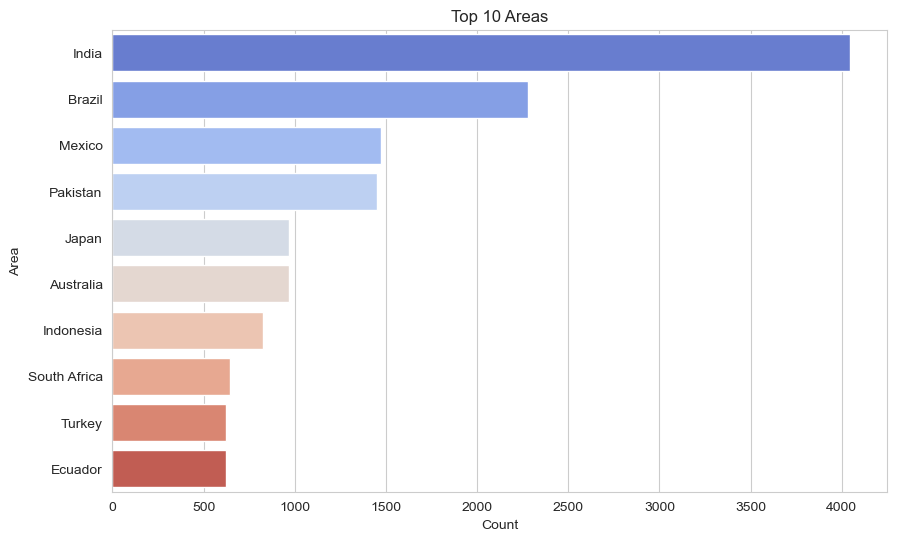

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the default figure size for better readability
plt.rcParams['figure.figsize'] = [10, 6]

## Area (Bar Plot of Top 10 Areas)
plt.figure()
area_counts = data['Area'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
plt.title('Top 10 Areas')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

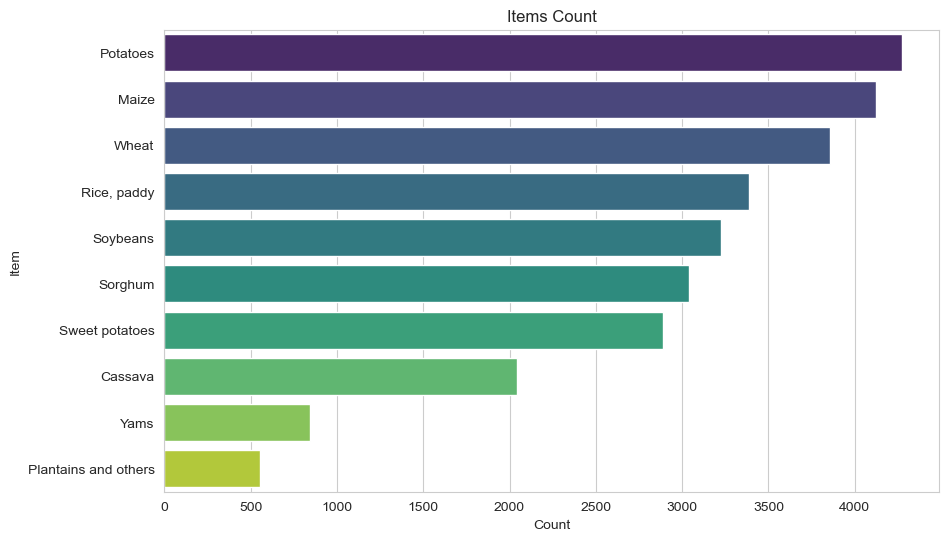

In [6]:

## Item (Bar Plot of Items)
plt.figure()
item_counts = data['Item'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Items Count')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

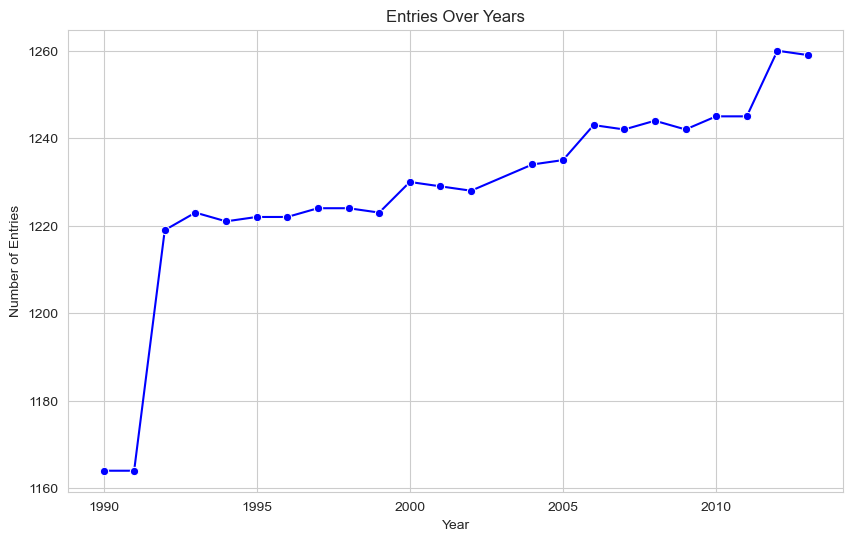

In [7]:
## Year (Line Plot of Entries Over Years)
plt.figure()
year_counts = data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
plt.title('Entries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()

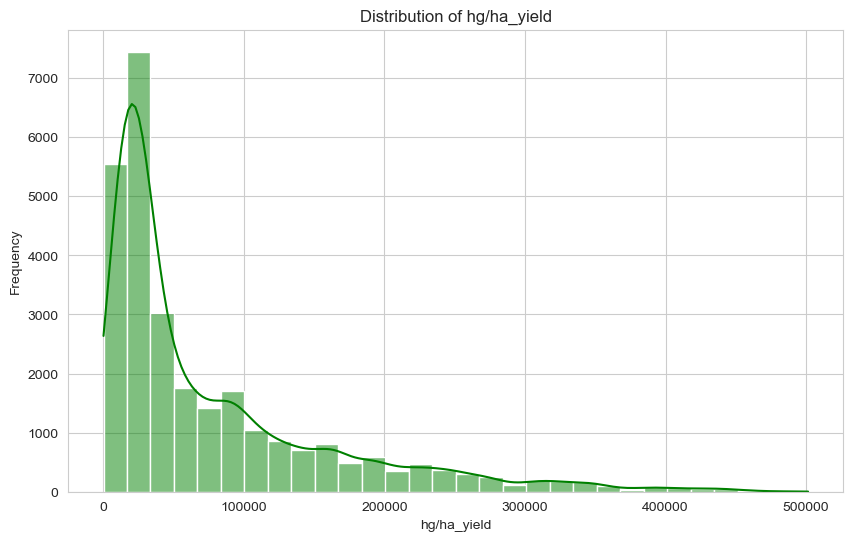

In [8]:

## hg/ha_yield (Histogram)
plt.figure()
sns.histplot(data['hg/ha_yield'], bins=30, kde=True, color='g')
plt.title('Distribution of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()


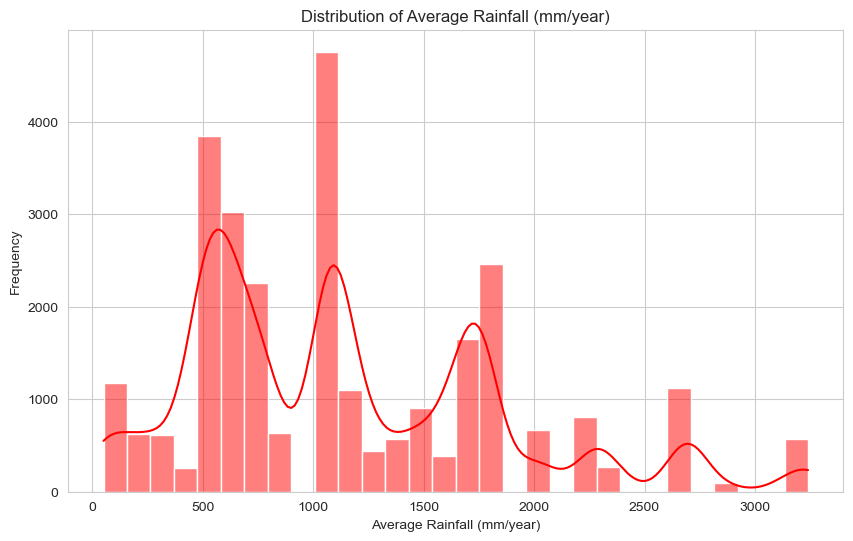

In [9]:

## average_rain_fall_mm_per_year (Histogram)
plt.figure()
sns.histplot(data['average_rain_fall_mm_per_year'], bins=30, kde=True, color='r')
plt.title('Distribution of Average Rainfall (mm/year)')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Frequency')
plt.show()

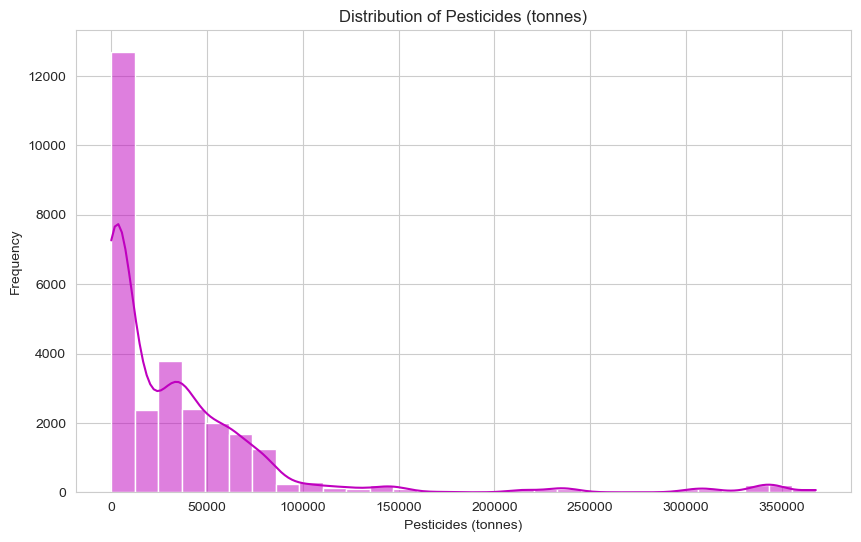

In [10]:

## pesticides_tonnes (Histogram)
plt.figure()
sns.histplot(data['pesticides_tonnes'], bins=30, kde=True, color='m')
plt.title('Distribution of Pesticides (tonnes)')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Frequency')
plt.show()

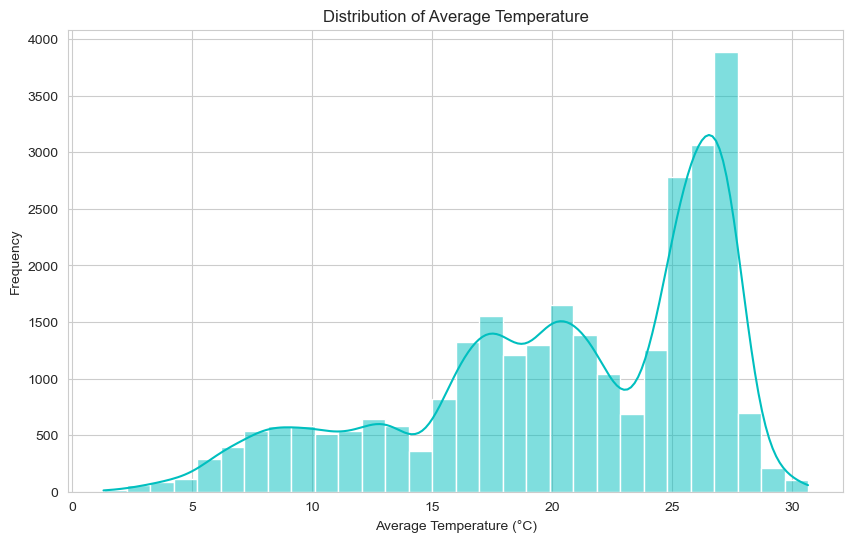

In [11]:
## avg_temp (Histogram)
plt.figure()
sns.histplot(data['avg_temp'], bins=30, kde=True, color='c')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

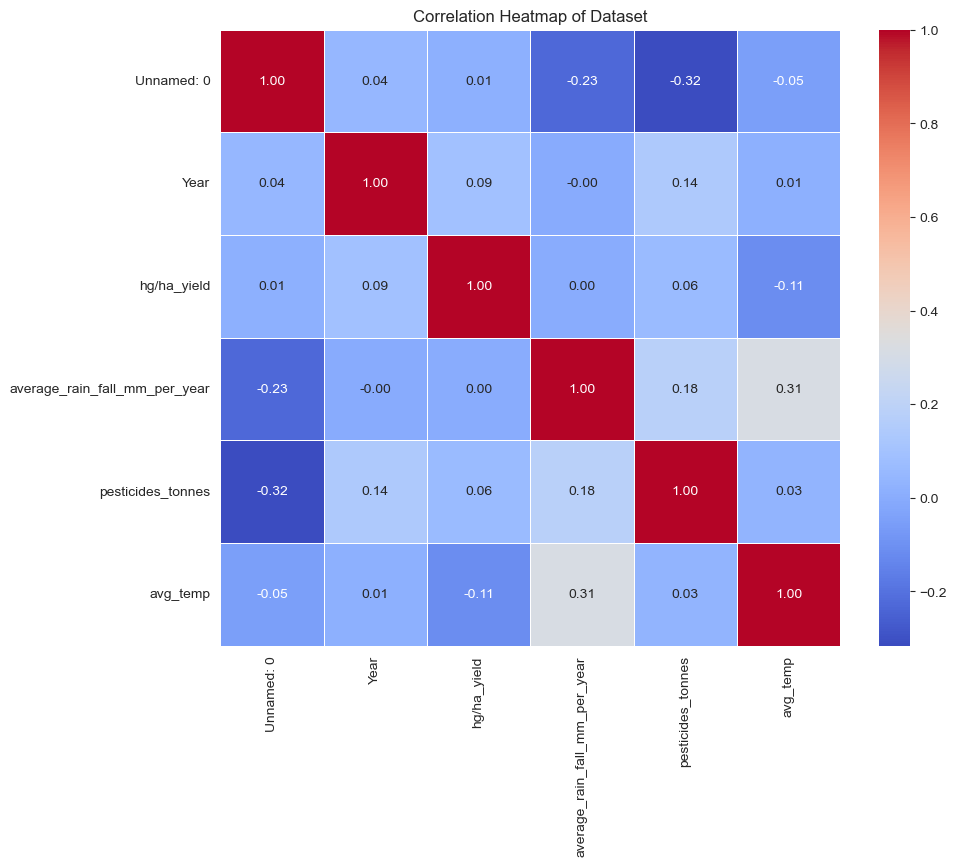

In [12]:
# Creating a correlation heatmap for the numerical columns in the dataset

# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True ,cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset')
plt.show()

# Model Evaluation

In [13]:
# Train XGBoost and Random Forest to predict the yield based on country, item, pesticide, avg_temp and rainfall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [14]:
# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [15]:
# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [16]:
# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [17]:
# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [22]:
# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
accuracy_xgb = xgb_model.score(X_test, y_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
accuracy_rf = rf_model.score(X_test, y_test)

In [23]:
print(f"RMSE XGBoot: {rmse_xgb}")
print(f"Acc XGBoost: {accuracy_xgb}")

print(f"RMSE RF: {rmse_rf}")
print(f"Acc RF: {accuracy_rf}")

RMSE XGBoot: 15710.22679308867
Acc XGBoost: 0.9659743055818336
RMSE RF: 14006.281839678952
Acc RF: 0.9729549486438772


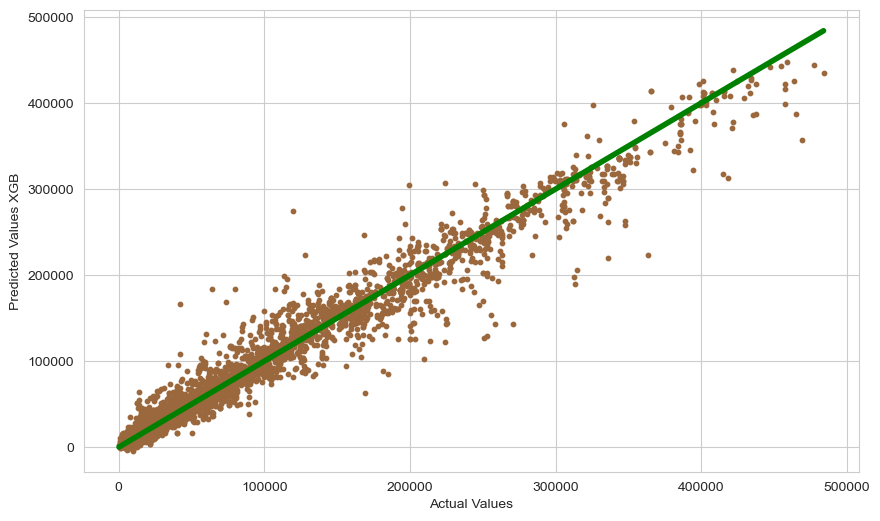

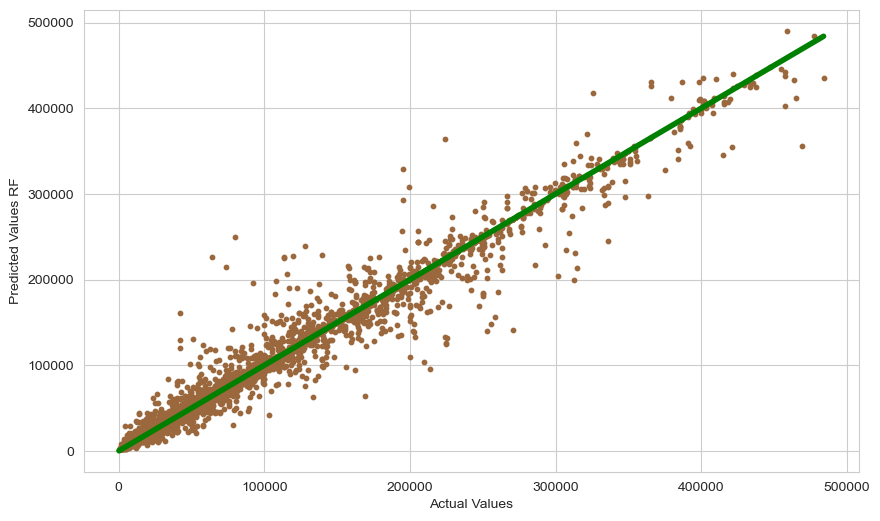

In [24]:
plt.scatter(y_test, y_pred_xgb,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values XGB')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

plt.scatter(y_test, y_pred_rf,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values RF')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

# Linear Regression

In [25]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
# Load the data
data = pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")

In [27]:
# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [28]:
# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [29]:
# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [30]:
# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

In [34]:
# Evaluate the model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
accuracy_lr = lr_model.score(X_test, y_test)
print(f"RMSE Linear Regression: {rmse_lr}")
print(f"Accuracy Linear Regression: {accuracy_lr}")

RMSE Linear Regression: 81779.33917978079
Accuracy Linear Regression: 0.07800347967984611


Text(0.5, 1.0, 'Actual vs Predicted Yield (Linear Regression)')

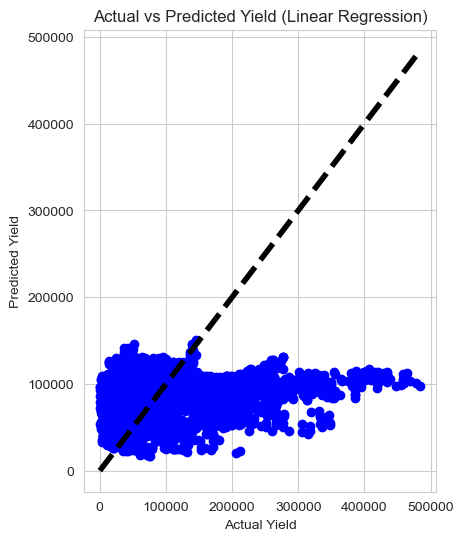

In [35]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted yield
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Linear Regression)')

# KNN

In [36]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [37]:
data = pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")

In [38]:
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [39]:
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [40]:
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [41]:
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
y_pred_knn = knn_model.predict(X_test)

In [45]:
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
accuracy_knn = knn_model.score(X_test, y_test)
print(f"RMSE KNN: {rmse_knn}")
print(f"Accuracy KNN: {accuracy_knn}")

RMSE KNN: 65779.91590164397
Accuracy KNN: 0.4034749085143441


In [46]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Yield (KNN)')

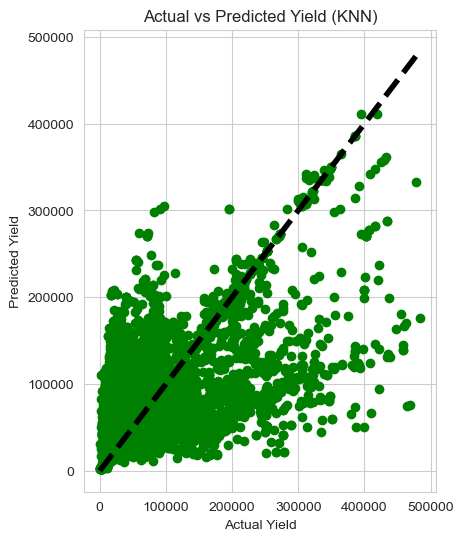

In [47]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (KNN)')

# Decision Tree

In [48]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [49]:
# Load the data
data = pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")

In [50]:
# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [51]:
# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [52]:
# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [53]:
# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']


In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [56]:
# Predict on test set
y_pred_tree = tree_model.predict(X_test)

In [57]:
# Evaluate the model
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
accuracy_tree = tree_model.score(X_test, y_test)
print(f"RMSE Decision Tree: {rmse_tree}")
print(f"Accuracy Decision Tree: {accuracy_tree}")


RMSE Decision Tree: 17397.363695085885
Accuracy Decision Tree: 0.9582737867448688


Text(0.5, 1.0, 'Actual vs Predicted Yield (Decision Tree)')

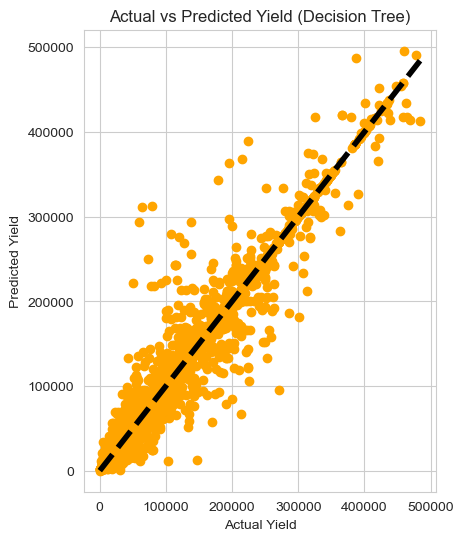

In [58]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted yield
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Decision Tree)')


# SVM

In [60]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [61]:
# Load the data
data = pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")

In [62]:
# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [63]:
# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [64]:
# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])


In [65]:
# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

SVR()

In [69]:
# Predict on test set
y_pred_svr = svr_model.predict(X_test_scaled)


In [70]:
# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
accuracy_svr = svr_model.score(X_test_scaled, y_test)
print(f"RMSE SVR: {rmse_svr}")
print(f"Accuracy SVR: {accuracy_svr}")

RMSE SVR: 93369.70413631141
Accuracy SVR: -0.20186047639294813


Text(0.5, 1.0, 'Actual vs Predicted Yield (SVR)')

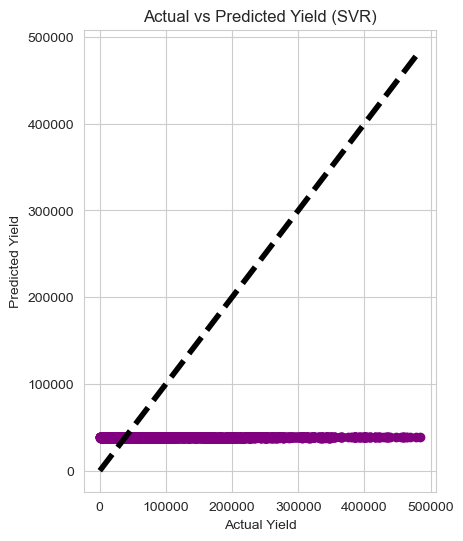

In [71]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted yield
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (SVR)')

# Gradient Boosting

In [73]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [74]:
# Load the data
data = pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")

In [75]:
# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [76]:
# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [77]:
# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [78]:
# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [79]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [81]:
# Predict on test set
y_pred_gb = gb_model.predict(X_test)

In [82]:
# Evaluate the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
accuracy_gb = gb_model.score(X_test, y_test)
print(f"RMSE Gradient Boosting: {rmse_gb}")
print(f"Accuracy Gradient Boosting: {accuracy_gb}")

RMSE Gradient Boosting: 35451.77654707242
Accuracy Gradient Boosting: 0.8267321068016773


In [83]:
# Visualize the results
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Yield (Gradient Boosting)')

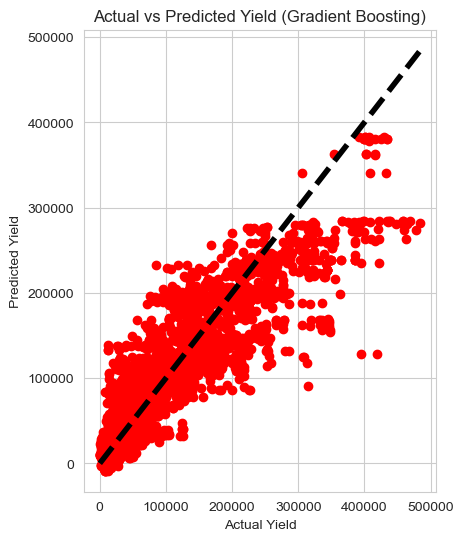

In [84]:
# Plotting actual vs predicted yield
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gb, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Gradient Boosting)')

# Multilayer perceptron

In [86]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [87]:
# Load the data
data = pd.read_csv("C:/Users/abinaya.v/Downloads/archive (1)/yield_df.csv")

In [88]:
# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [89]:
# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

In [90]:
# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

In [91]:
# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

In [92]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Initialize and train the MLP model
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train_scaled, y_train)

C:\Users\abinaya.v\anaconda3\aNACONDA\New folder\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [95]:
# Predict on test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [96]:
# Evaluate the model
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
accuracy_mlp = mlp_model.score(X_test_scaled, y_test)
print(f"RMSE MLP: {rmse_mlp}")
print(f"Accuracy MLP: {accuracy_mlp}")

RMSE MLP: 85787.77016345732
Accuracy MLP: -0.014595302789831122


In [97]:
# Visualize the results
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Yield (MLP)')

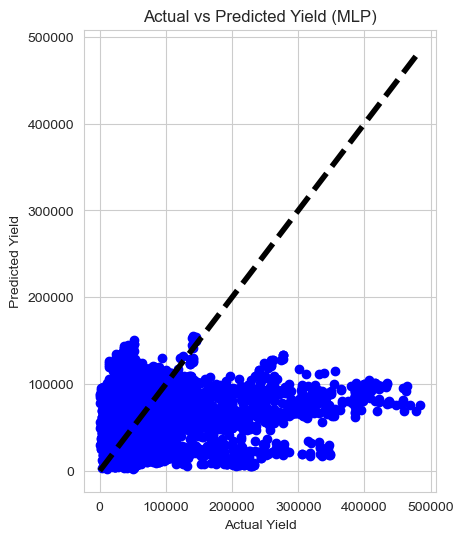

In [98]:
# Plotting actual vs predicted yield
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mlp, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (MLP)')